In [51]:
# a. IMPORTING NECESSARY PACKAGES ->
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential

In [52]:
# b. LOAD THE TRAINING AND TESTING DATA (MNIST) - >
data=pd.read_csv('C:\\Users\\anura\\Downloads\\mnist_784_csv.csv')
data.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [53]:
# x=data.drop(['class'], axis=1)
# y=data['class'].values

X = data.drop(columns=['class']).values
Y = data['class'].values

In [57]:
# Splitting it into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
# x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [58]:
x_train.shape

(49000, 784)

In [59]:
x_test.shape

(21000, 784)

In [60]:
x_train = x_train/255
x_test=x_test/255

In [49]:
# Check the shape of x_train
# print(x_train.shape)

# import math

# # Assuming all images are square, calculate dimensions
# flat_length = x_train.shape[1]
# side_length = int(math.sqrt(flat_length))
# print("Image Height:", side_length)
# print("Image Width:", side_length)



In [61]:
# c. DEFINE THE NETWORK ARCHITECTURE USING KERAS ->
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.summary()



C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# d. TRAIN THE MODEL USING SGD ->

model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])
history=model.fit(x_train,
y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6401 - loss: 1.2376 - val_accuracy: 0.8964 - val_loss: 0.3468
Epoch 2/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9122 - loss: 0.3025 - val_accuracy: 0.9244 - val_loss: 0.2567
Epoch 3/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9345 - loss: 0.2245 - val_accuracy: 0.9360 - val_loss: 0.2137
Epoch 4/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9466 - loss: 0.1886 - val_accuracy: 0.8497 - val_loss: 0.4510
Epoch 5/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9544 - loss: 0.1589 - val_accuracy: 0.9466 - val_loss: 0.1806
Epoch 6/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9609 - loss: 0.1400 - val_accuracy: 0.9567 - val_loss: 0.1455
Epoch 7/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9651 - loss: 0.1218 - val_accuracy: 0.9585 - val_loss: 0.1380
Epoch 8/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9696 - loss: 0.1072 - 

In [63]:
# e. EVALUATE THE NETWORK
test_loss, test_acc=model.evaluate(x_test,y_test)
print("Loss-%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.9633 - loss: 0.1192
Loss-0.117
Accuracy=0.963


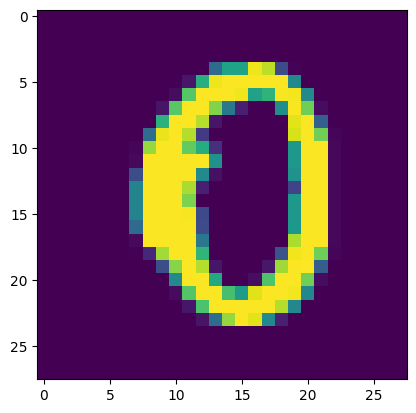

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted Value:  5


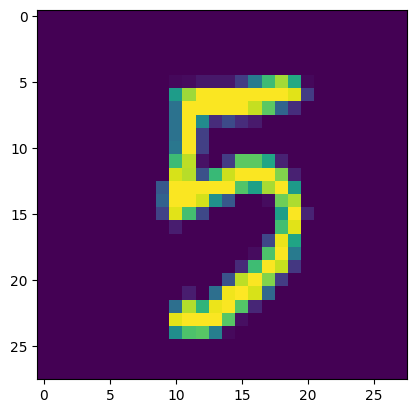

In [65]:
x_test_img = x_test.to_numpy().reshape(x_test.shape[0],28,28)
plt.imshow(x_test_img[0])
plt.show()
n=random.randint(0,500)
plt.imshow(x_test_img[n])
predicted_value = model.predict(x_test)
print('Predicted Value: ',np.argmax(predicted_value[n]))

# n=random.randint(0,9999)
# plt.imshow(x_test[n])
# plt.show()
# predicted_value=model.predict(x_test)
# plt.imshow(x_test[n])
# plt.show()
# print('Predicted Value: ', predicted_value[n])

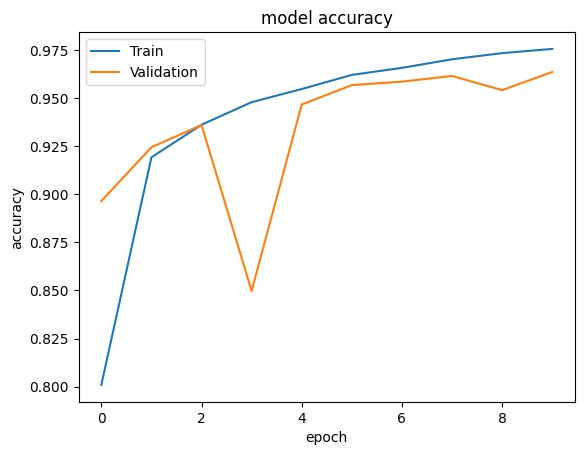

In [68]:
# Plotting The Training Accuracy :-
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend (['Train', 'Validation'], loc='upper left')
plt.show()

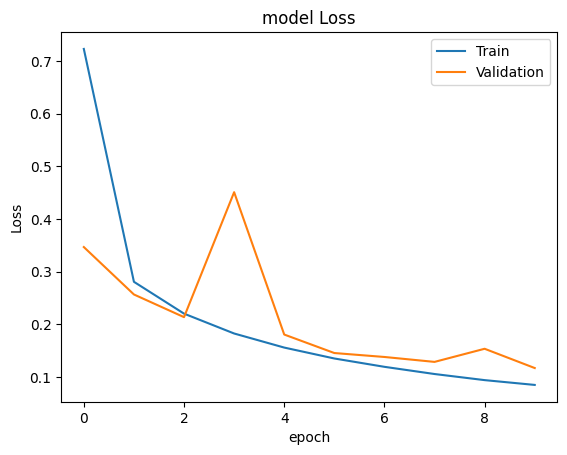

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()